## Watts Strogatz Small World Model  Analysis and its Characteristic


Analyse the Watts Strogatz Small World Model for p = $10^{−3}$,  $1.×10^{−2}$,  $5.×10^{−2}$, $10^{−1}$ for $k_{0} = 6$, by performing following tasks:

1. Draw graph with n = 1000 for each value of p. Discuss qualitatively how the graphs change with p.
2. Find the standard deviation $σ_{k}$ of degree k and plot the distribution of k for each value of p.
3. Calculate the diameter and the distance distribution for n = 10, 100, 1000 of the random graph for each value of p. Discuss the dependence on p, and n. 
4. Calculate the mean eigenvector centrality and their distributions for n = 1000 and for each value of p. Discuss the dependence on p.
5. Calculate the mean betweennes centrality and their distributions for n = 1000 and for each value of p. Discuss the dependence on p.
6. Calculate the mean clossness centrality and their distributions for n = 1000 and for each value of p. Discuss the dependence on p.
7. Calculate the mean clustering coefficient and distributions for n = 10, 100, 1000 and for each value of p and n. Discuss the dependence on p.

In [2]:
# import required libraries

import my_graph
import networkx as nx
import matplotlib.pyplot as plt
from statistics import stdev

### 1. Draw graph with n = 1000 for each value of p. Discuss qualitatively how the graphs change with p.

#### a. Draw a random graph with n = 1000 for each value of p:

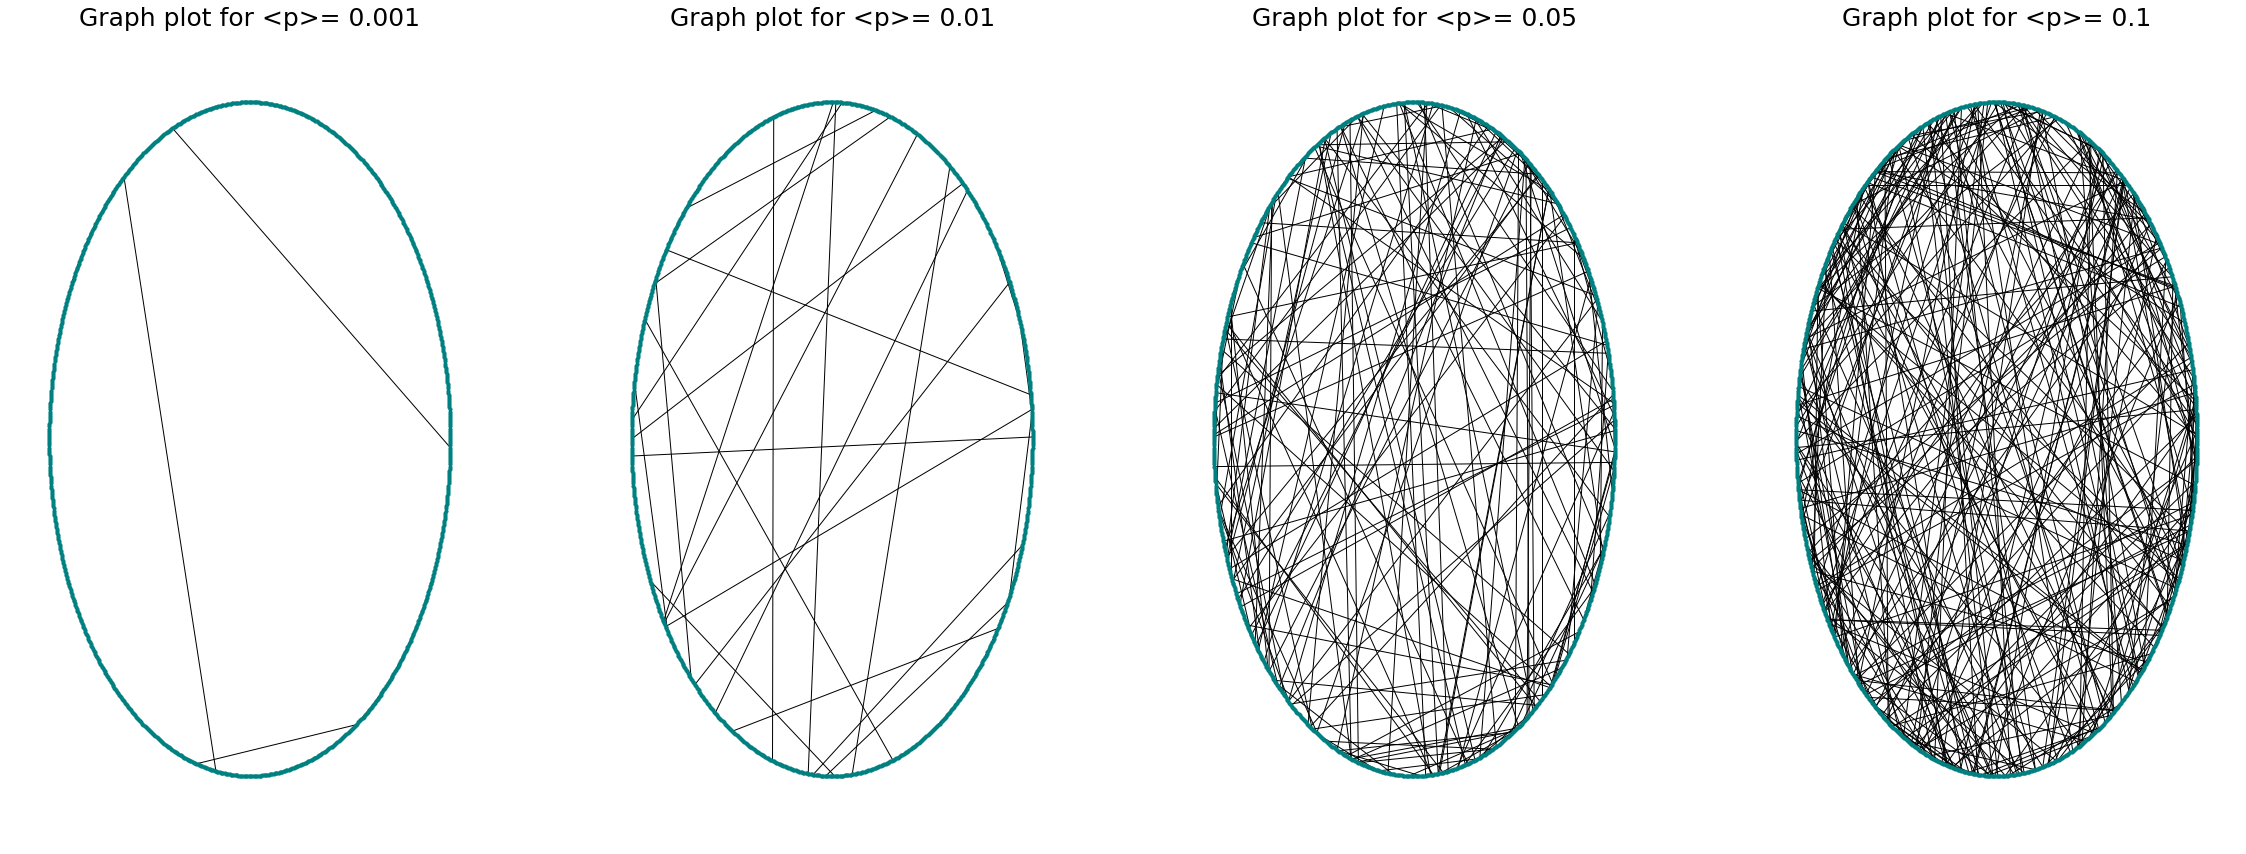

In [4]:
n = 1000
p_values = [0.001, 0.01, 0.05, 0.1]
k0 = 6

wsG_list = []

# Configure figures
plt.figure(figsize=(40, 15))
fig_num = 140

for p in p_values:
    
    # Generate Watts Strogatz Small World Model
    wsG = nx.watts_strogatz_graph(n, k0, p)
    wsG_list.append(wsG)
    
    fig_num += 1
    plt.subplot(fig_num)
    nx.draw_circular(wsG, with_labels=False, node_color='teal', node_size=10)
    plt.title(f'Graph plot for <p>= {p}', size=25)

print("\n\n")

#### b. Discuss qualitatively how the graphs change with p

From the above graphs, we have observed the following:

* for p = 0.001, the re-wiring probability is very low and hence graph looks like a regular graph.
* for p = 0.01, the re-wiring probability increases and hence we can see a few re-wirings of the edges of some of the nodes. But majority of the edges maintain the original edge.
* for p = 0.05, the re-wiring probability increases and hence we can see more edges between the nodes are re-wired.
* for p = 0.1, with the increase in re-wiring probability, many of the edges are now re-wired between the nodes. 

### 2. Find the standard deviation $σ_{k}$ of degree k and plot the distribution of of k for these values of p:

Standard deviatiation for value p = 0.001 is: 0.09 



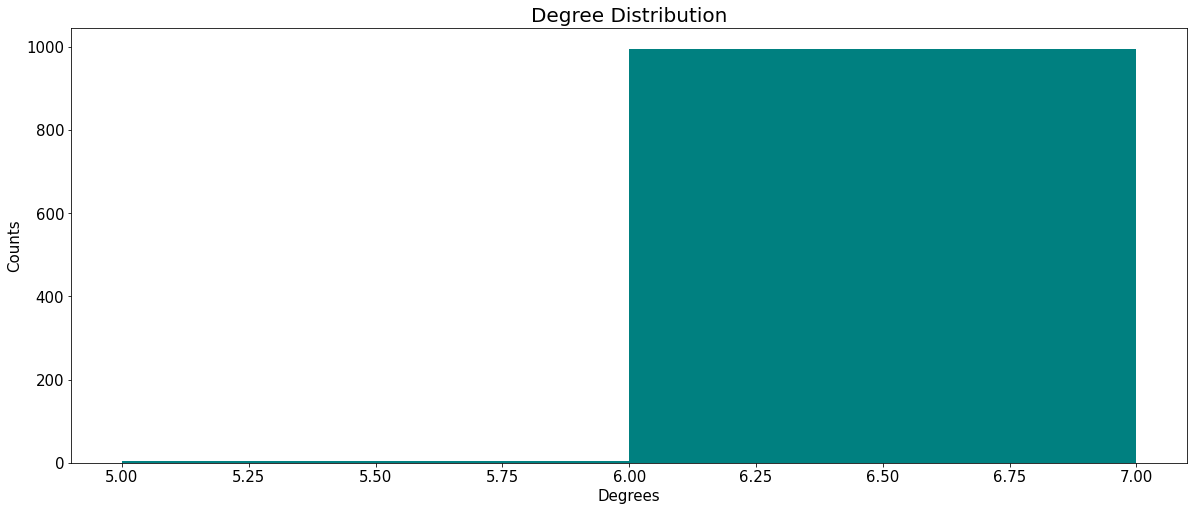

Standard deviatiation for value p = 0.01 is: 0.22 



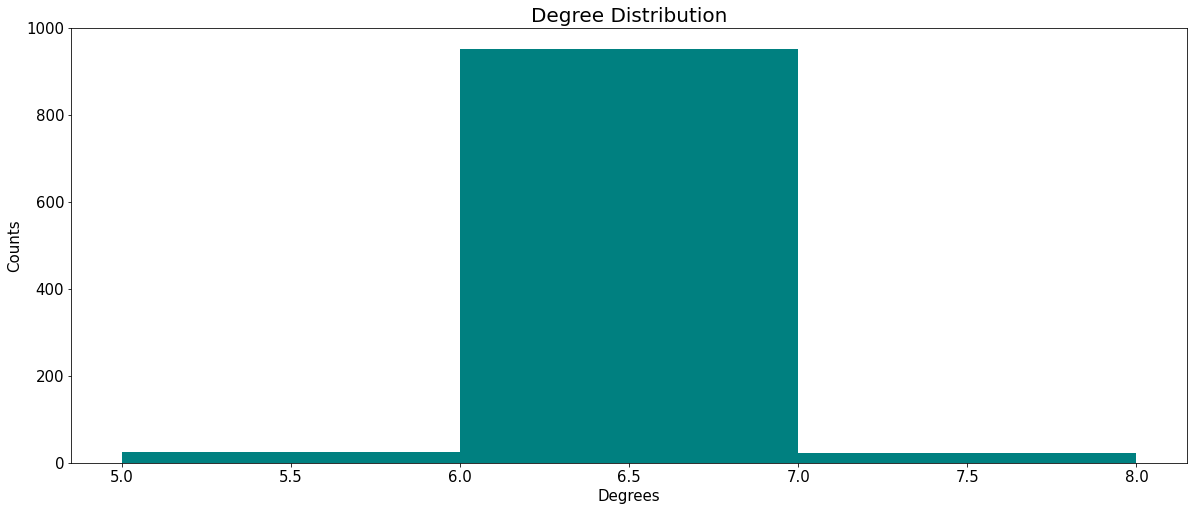

Standard deviatiation for value p = 0.05 is: 0.56 



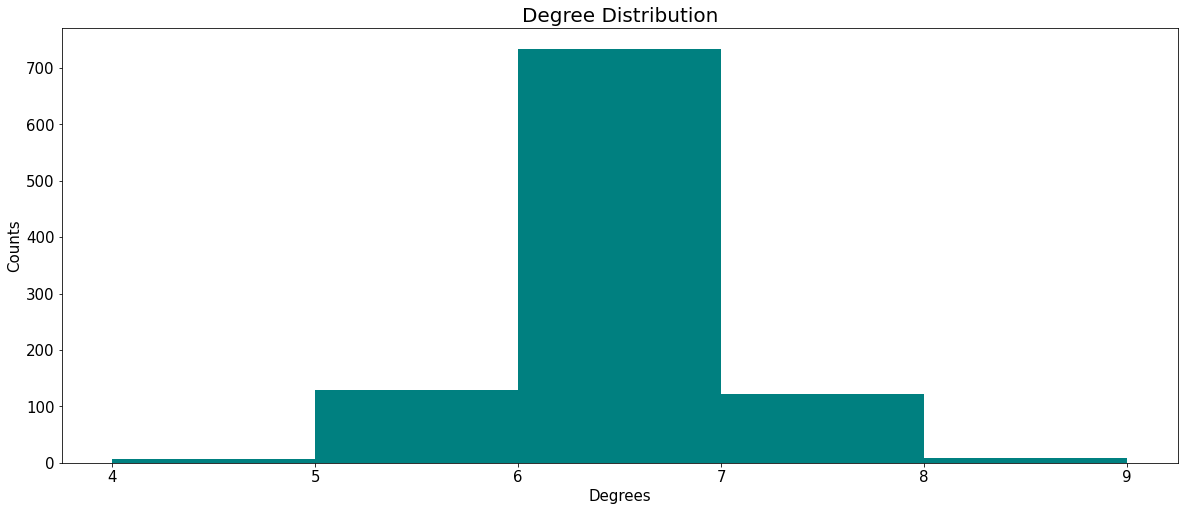

Standard deviatiation for value p = 0.1 is: 0.77 



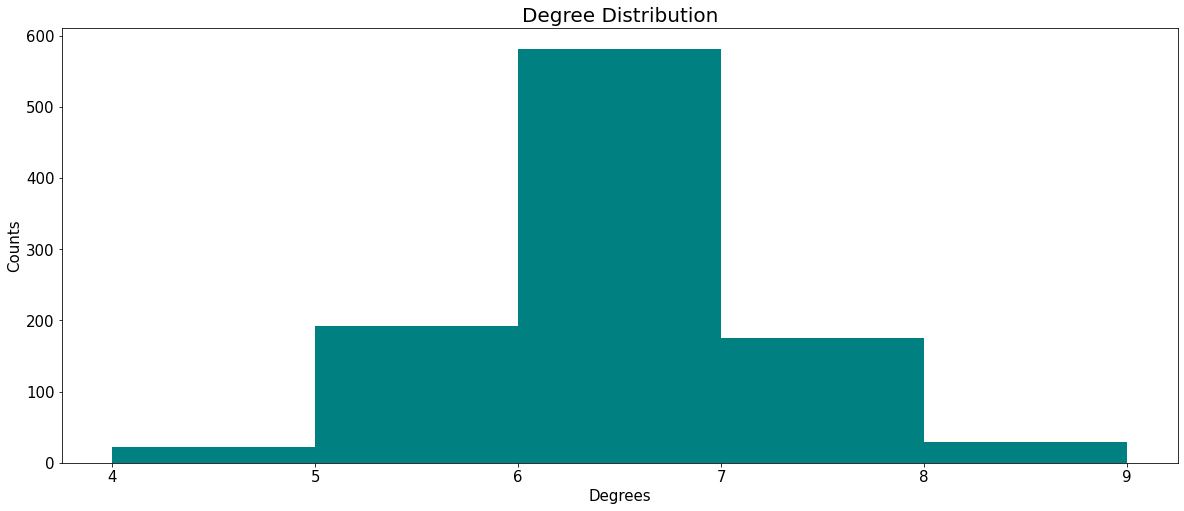

In [5]:
for i, wsG in enumerate(wsG_list):

    degree_list = my_graph.find_degrees(wsG, directed=False).values()
    
    std_dev = stdev(degree_list)
    print("Standard deviatiation for value p = {} is: {}".format(p_values[i], round(std_dev,2)),"\n")
    
    # plot historgram for degrees of the graph
    my_graph.plot_distribution(in_list=degree_list, pdf=False, cum=False, bw=1,\
                            title="Degree Distribution", \
                            x_label="Degrees", y_label="Counts",\
                            x_scale="linear", y_scale="linear",\
                            c="teal")

We can see from the above plot of Degree Distribution, degree distribution is a binomial distribution with the peak at around k0 and but has unrealistically narrow degree distribution compare to real world network..

### 3. Calculate the diameter and the distance distribution for n = 10, 100, 1000 and each value of p. Discuss the dependence on p, and n:

#### a. Calculate and Plot Diameter as function of p for each n

Diameter list for n = 10 and <p> = [0.001, 0.01, 0.05, 0.1]: [2, 2, 2, 2]
Diameter list for n = 100 and <p> = [0.001, 0.01, 0.05, 0.1]: [17, 17, 10, 8]
Diameter list for n = 1000 and <p> = [0.001, 0.01, 0.05, 0.1]: [112, 31, 15, 11]





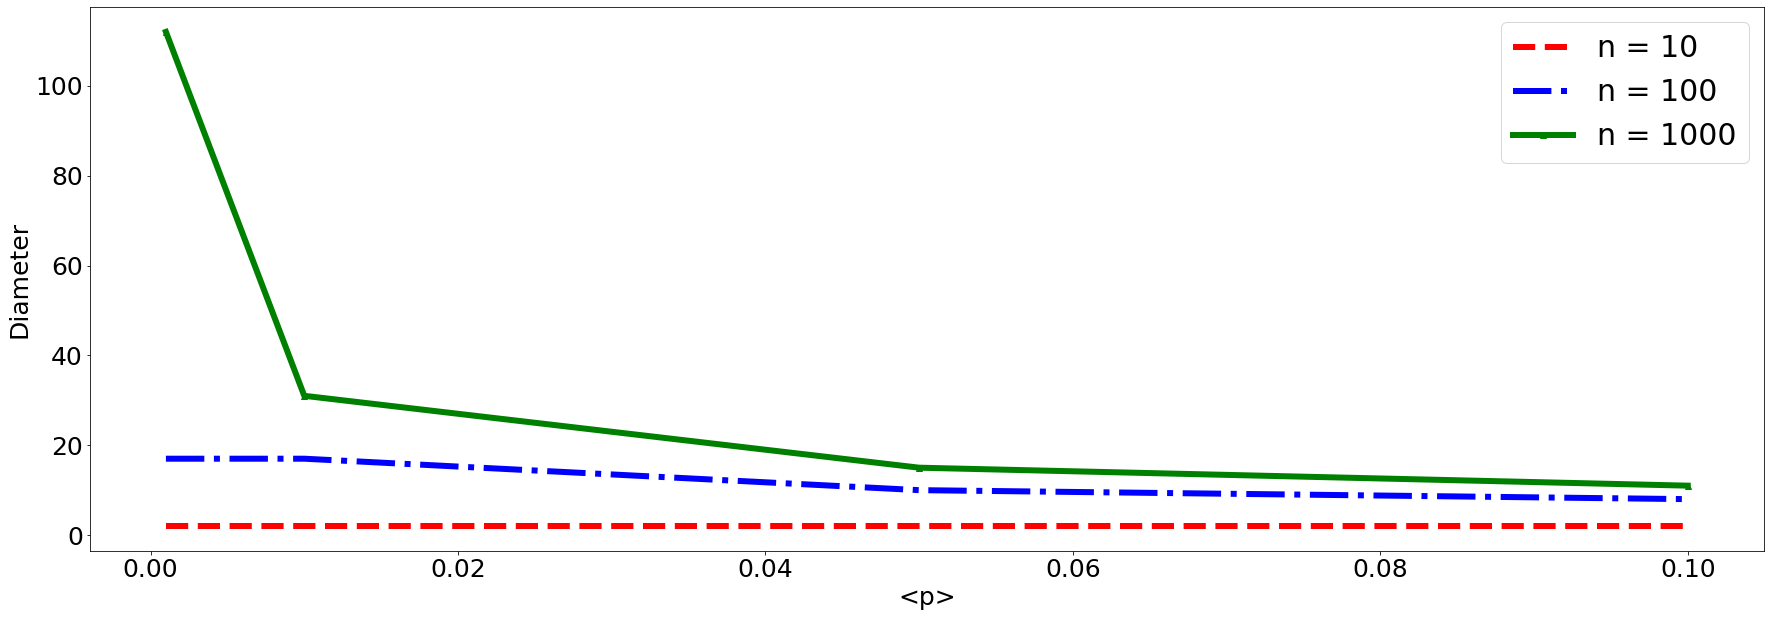

In [6]:
nodes = [10, 100, 1000]
p_values = [0.001, 0.01, 0.05, 0.1]

plt.figure(figsize = (30,10))
dia_all = []

for n in nodes:
    dia_list = []
    for p in p_values:
        wsG = nx.watts_strogatz_graph(n, k0, p)
        
        # Find diameter of the graph
        dia_list.append(my_graph.find_diameter(wsG))
    print("Diameter list for n = {} and <p> = {}: {}".format(n,p_values,dia_list))
    dia_all.append(dia_list)
    
plt.plot(p_values, dia_all[0],'r--', label='n = 10',linewidth=6)
plt.plot(p_values, dia_all[1],'b-.', label='n = 100',linewidth=6)
plt.plot(p_values, dia_all[2],'g-^', label='n = 1000',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('<p>',size=25)
plt.ylabel('Diameter',size=25)
plt.legend(fontsize = 30)
print("\n\n")

#### b. Calculate and Plot Diameter as function of n for each p:

Diameter list for <p> = 0.001 and n = [10, 100, 1000]: [2, 17, 116]
Diameter list for <p> = 0.01 and n = [10, 100, 1000]: [2, 12, 31]
Diameter list for <p> = 0.05 and n = [10, 100, 1000]: [2, 8, 14]
Diameter list for <p> = 0.1 and n = [10, 100, 1000]: [2, 7, 11]





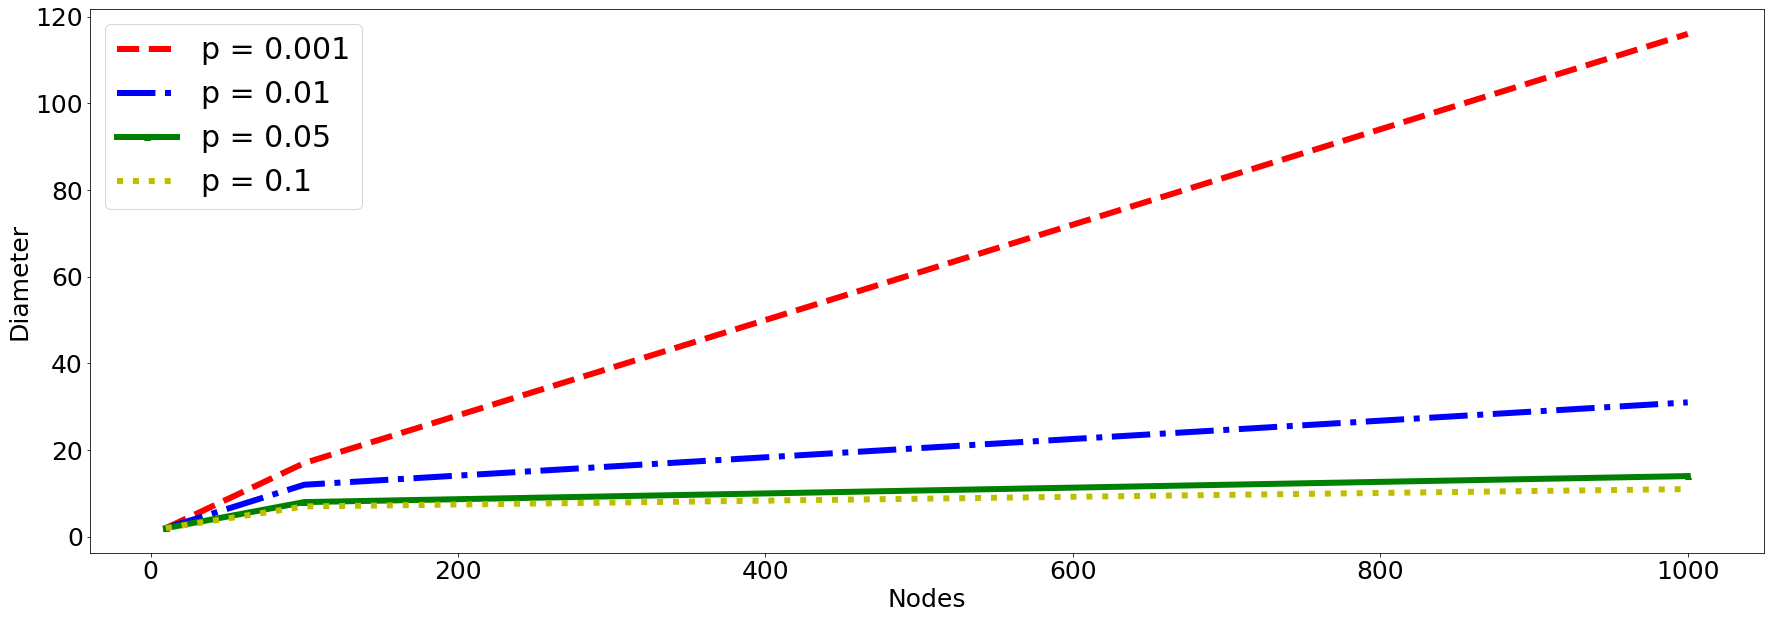

In [7]:
plt.figure(figsize = (30,10))
dia_all = []

for p in p_values:
    dia_list = []
    for n in nodes:
        wsG = nx.watts_strogatz_graph(n, k0, p)
        
        # Find diameter of the graph
        dia_list.append(my_graph.find_diameter(wsG))
        
    print("Diameter list for <p> = {} and n = {}: {}".format(p, nodes, dia_list))
    dia_all.append(dia_list)
    
plt.plot(nodes, dia_all[0],'r--', label='p = 0.001',linewidth=6)
plt.plot(nodes, dia_all[1],'b-.', label='p = 0.01',linewidth=6)
plt.plot(nodes, dia_all[2],'g-^', label='p = 0.05',linewidth=6)
plt.plot(nodes, dia_all[3],'y:', label='p = 0.1',linewidth=6)

plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Nodes',size=25)
plt.ylabel('Diameter',size=25)
plt.legend(fontsize = 30)
print("\n\n")

#### c. Discuss the dependence on p, and n:

We have observed that when value of n increase, diameter is also increase for each value of p.

However, for large value of p, diameter is small compare to other graphs which have small value of p. 

And we also observe that with the increase in value of p from 0.001 to 0.1, the diameter of the graphs also decreases for every value of n.

#### Distance Distribution for n = 10, 100, 1000  and for each value of p. 

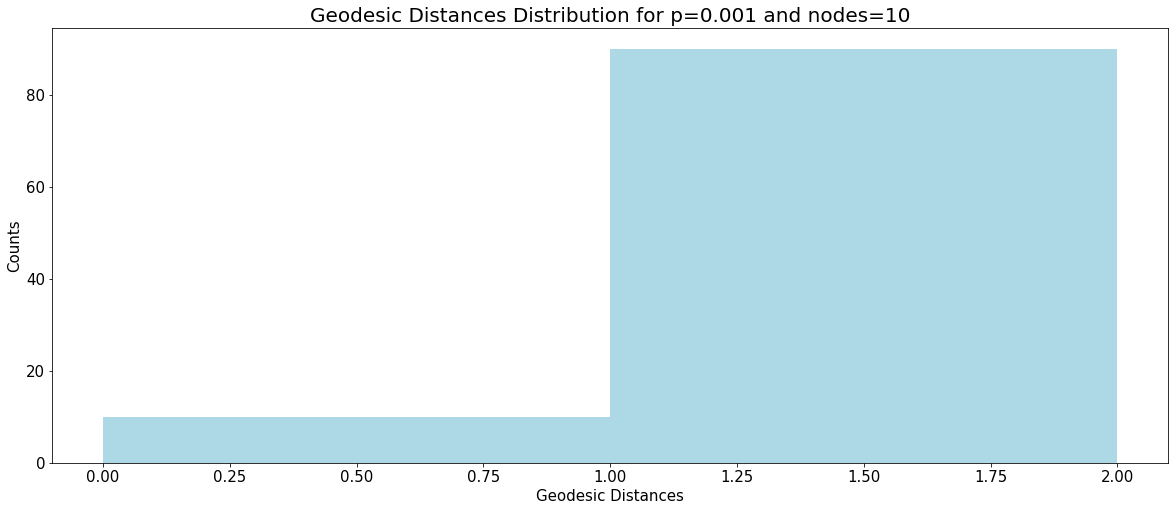

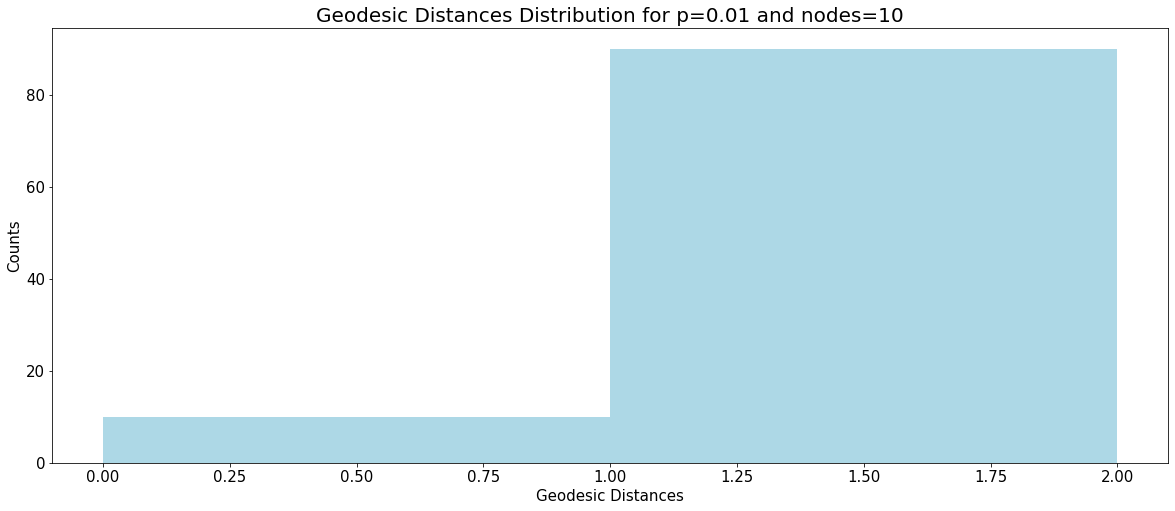

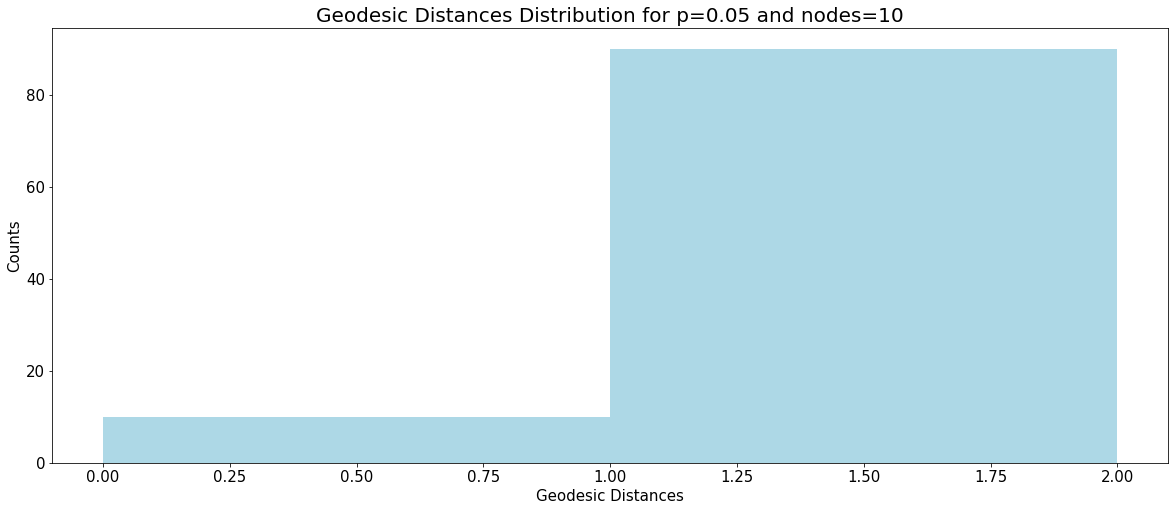

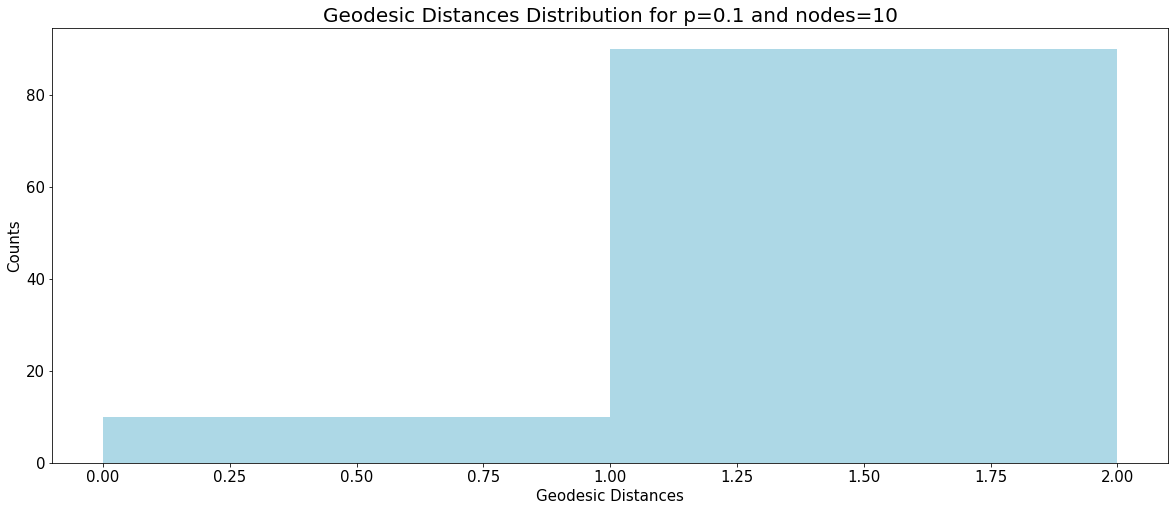

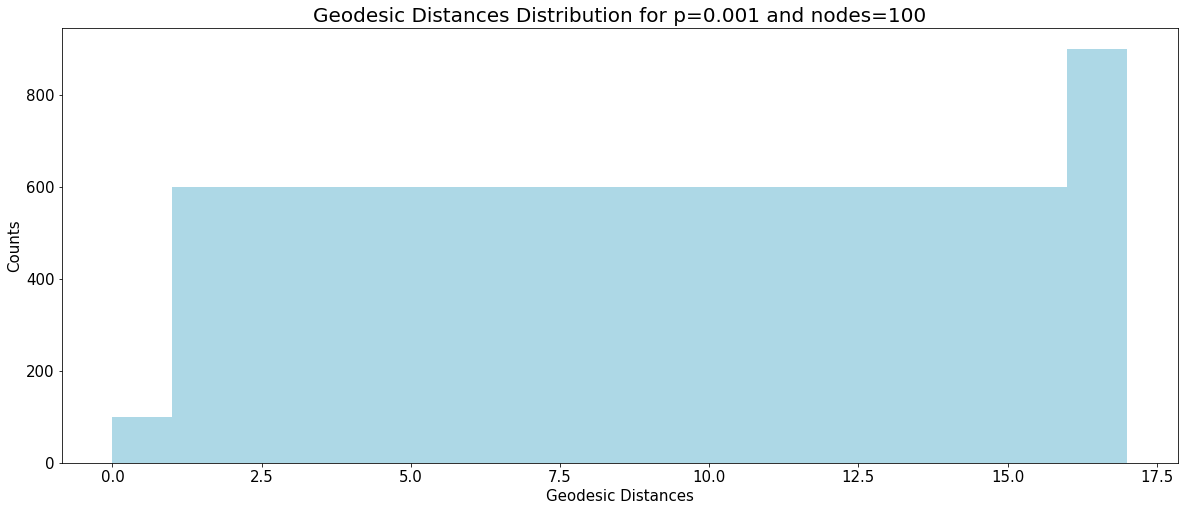

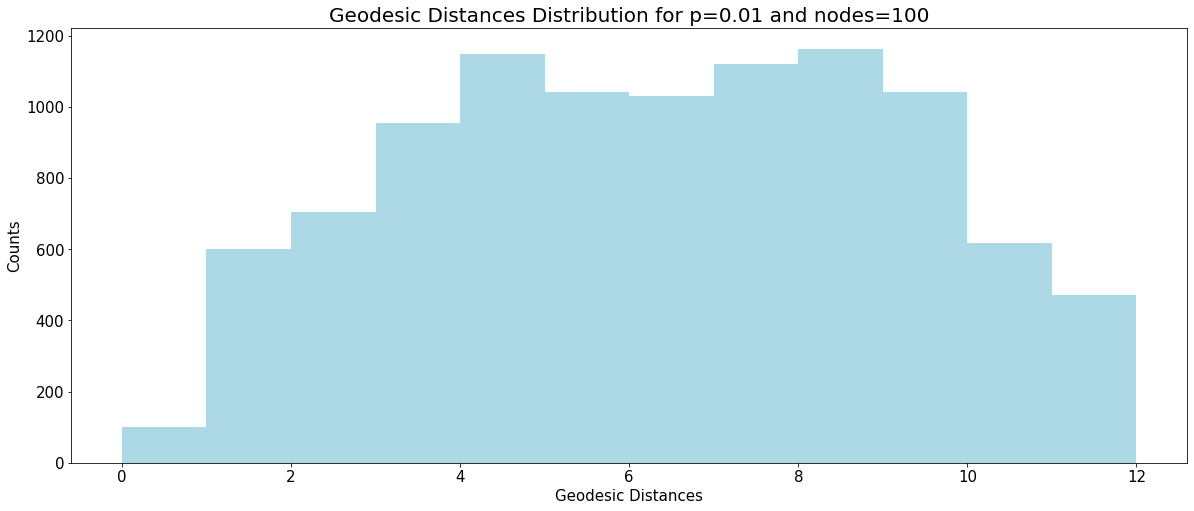

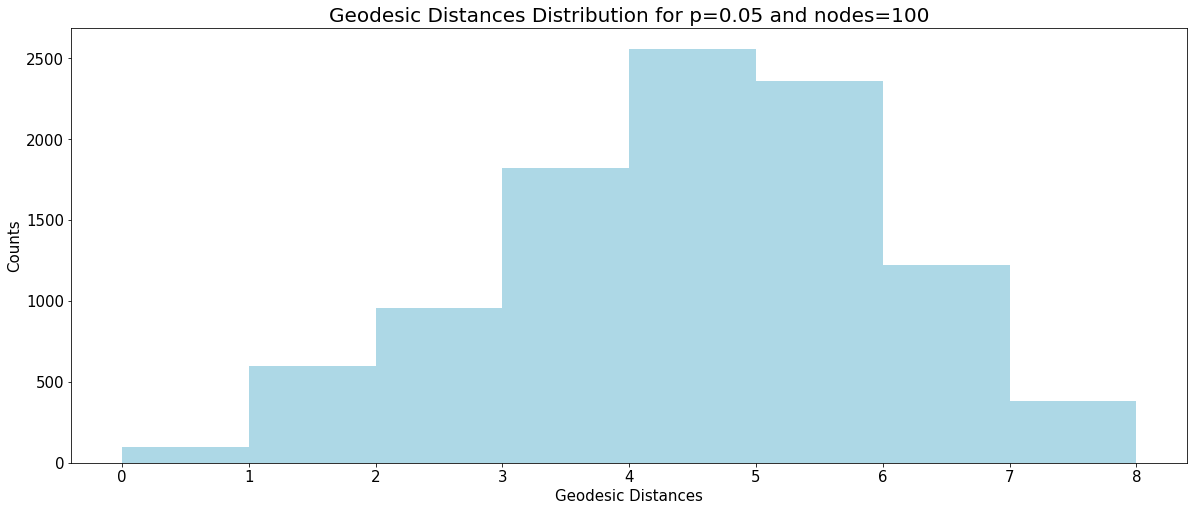

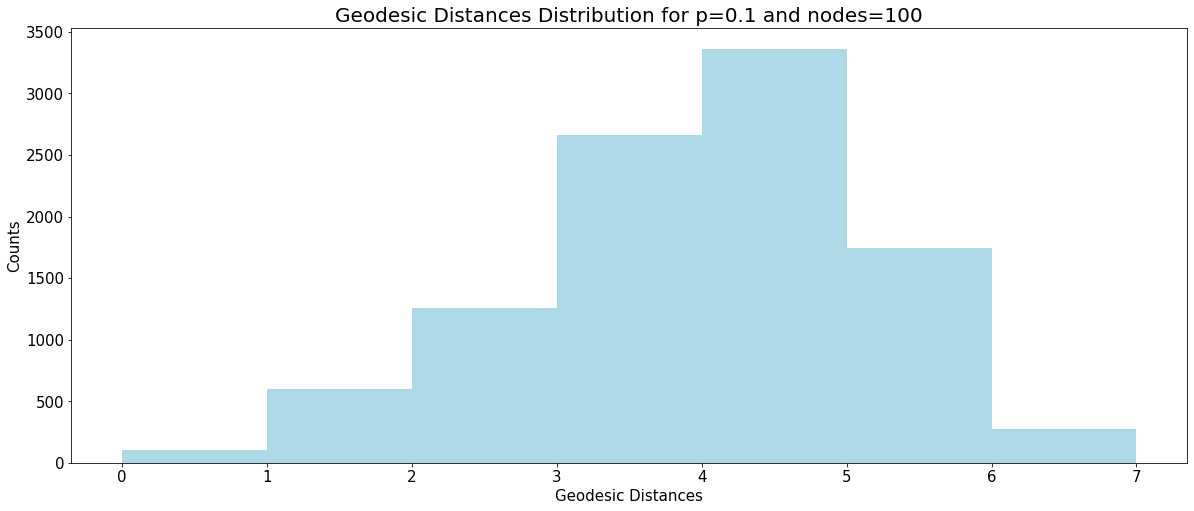

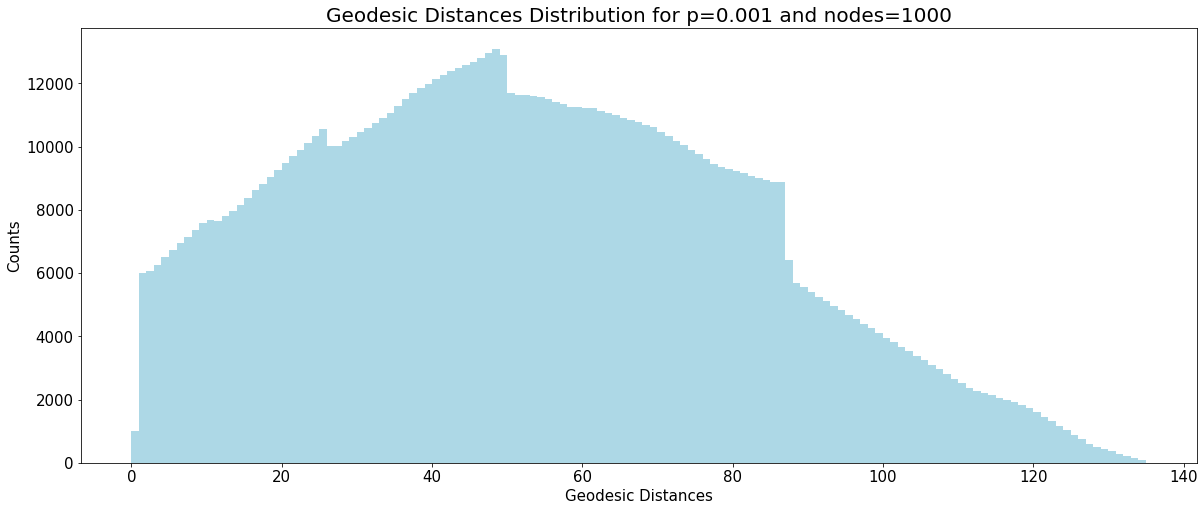

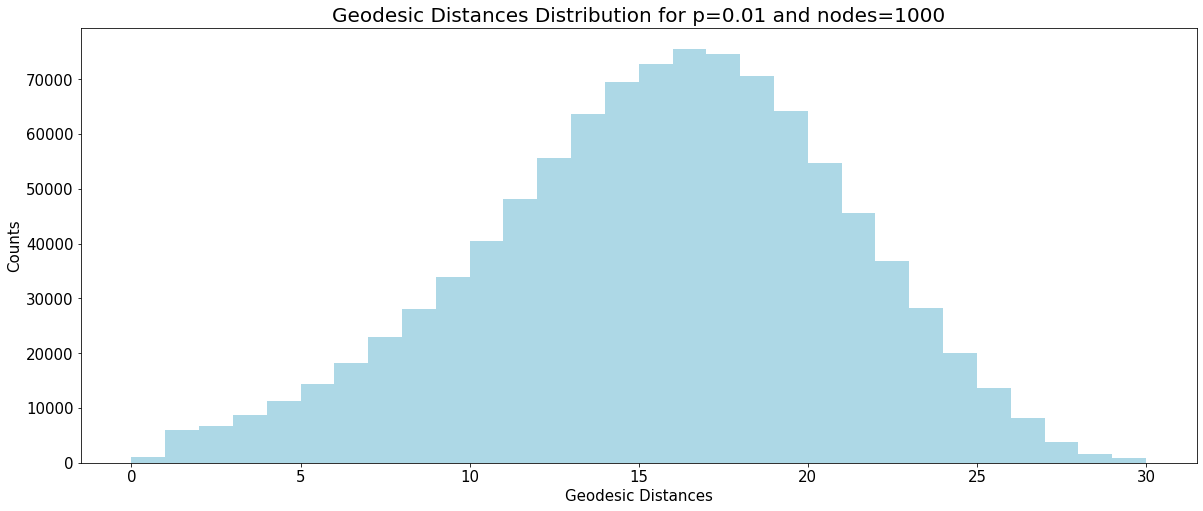

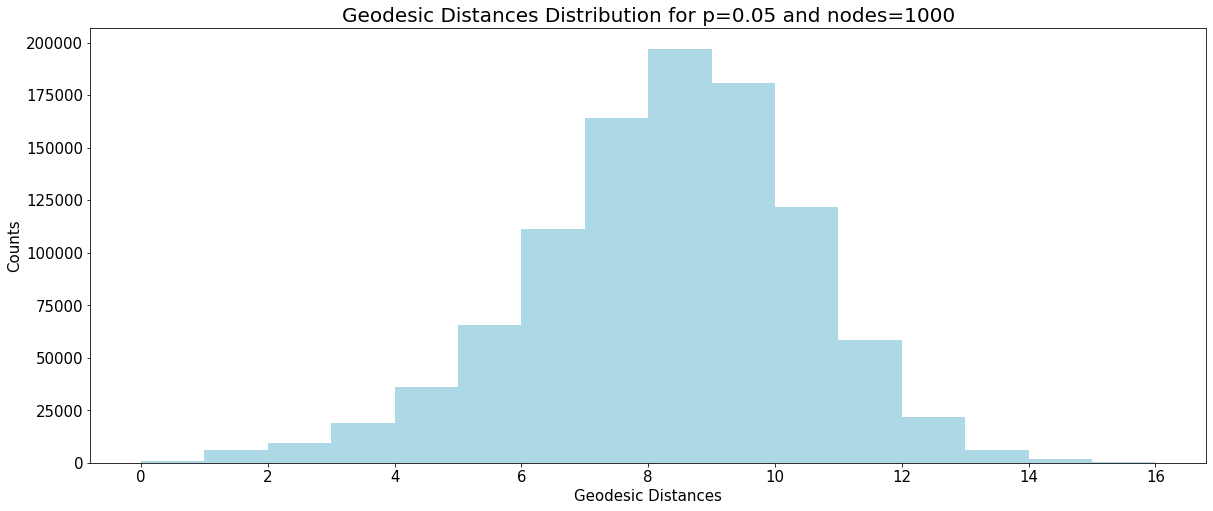

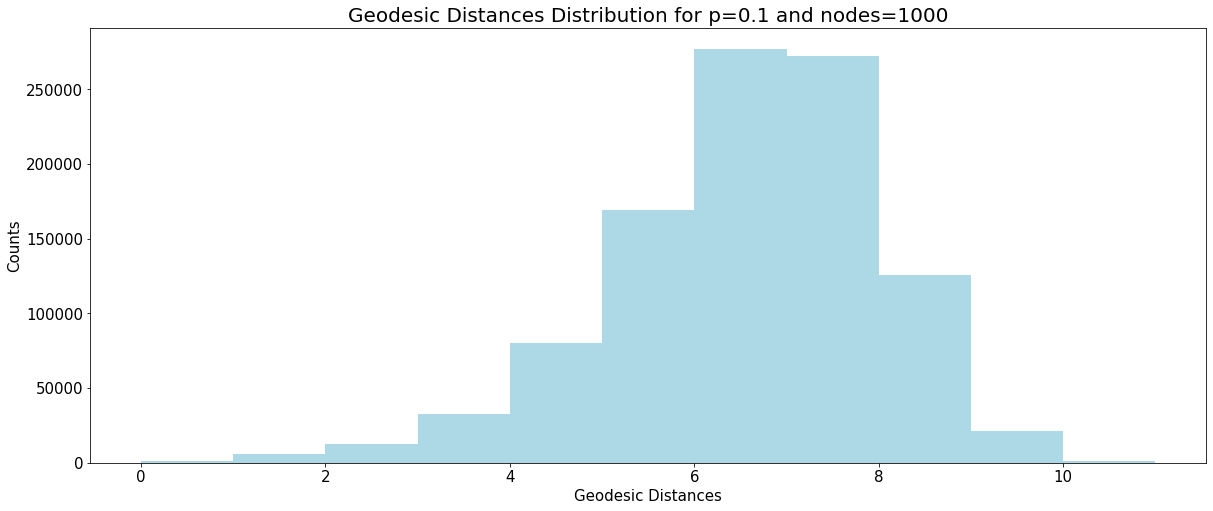

In [8]:
for n in nodes:
    for p in p_values:
        
        wsG = nx.watts_strogatz_graph(n, k0, p)
        
        # Find geodesic distance for each node
        geo_dis = my_graph.find_geodesic_distance(wsG)
        
        # plot historgram for geodesic distances of the graph
        my_graph.plot_distribution(in_list=geo_dis, pdf=False, cum=False, bw=1,\
                                title=f"Geodesic Distances Distribution for p={p} and nodes={n}",\
                                x_label="Geodesic Distances", y_label="Counts",\
                                x_scale="linear", y_scale="linear", \
                                c="lightblue")

    print("\n\n")

#### Discuss the dependence on p and n.

### 4. The mean eigenvector centrality and its distributions for n = 1000 and ecah value of p. Discuss the dependence on p:

#### a. The mean eigenvector centrality and its distributions for n = 1000 and for the each value of p:

#### Eigenvector Centrality:

A natural extension of the simple degree centrality is eigenvector centrality. Instead of awarding vertices just point for each neighbour, eigenvector centrality gives each vertex a score proportional to the sum of the scores of its neighbours.

The Eigenvector Centrality has nice property that it can be larger either because a vertex has many neighbours or it has important neighbours (or both).

The Eigenvector centrality for node $i$ is:  
$$x_{i} = \alpha \sum_{j} A_{ij} x_{j}$$

Here
* $A$ is the adjacency matrix of graph G.

The Mean Eigenvector centralitiy for p = 0.1: 0.017


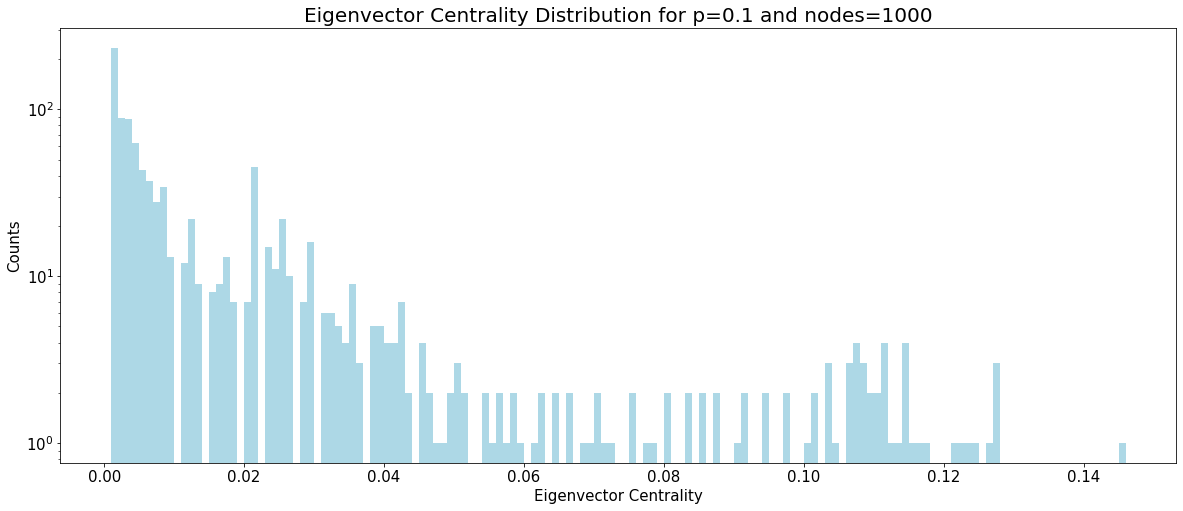

The Mean Eigenvector centralitiy for p = 0.1: 0.024


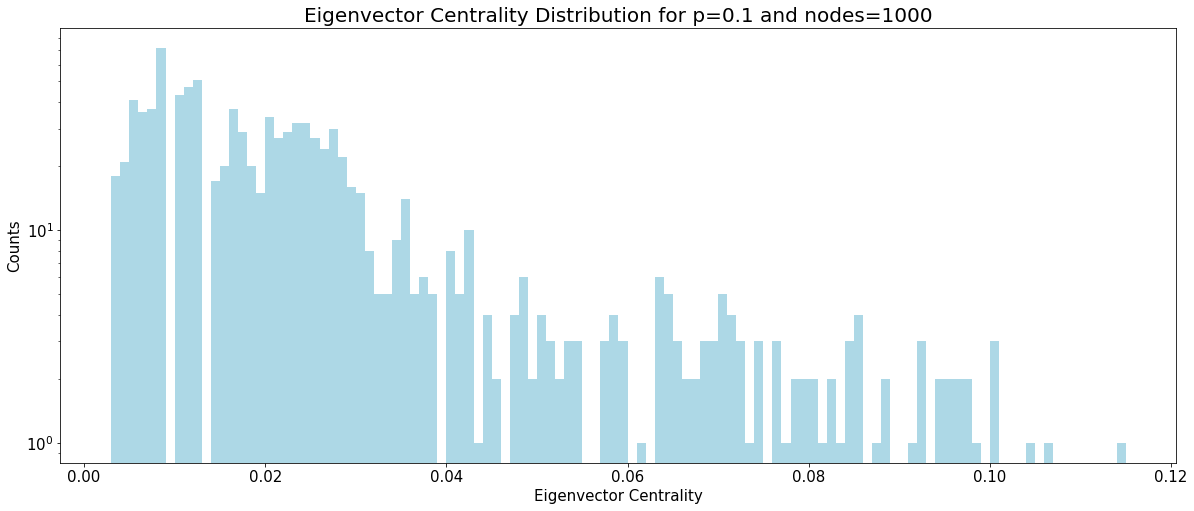

The Mean Eigenvector centralitiy for p = 0.1: 0.028


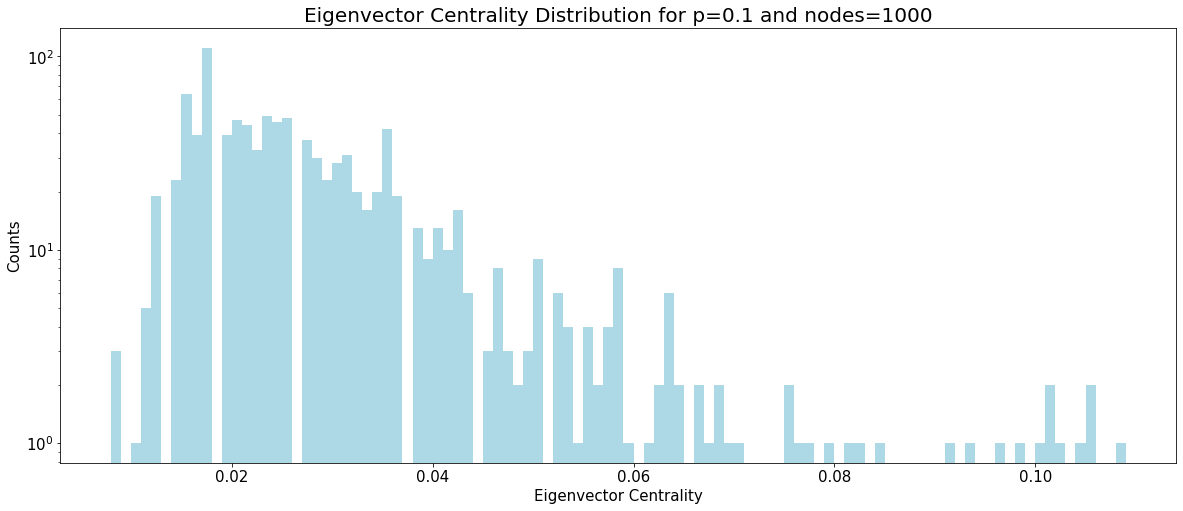

The Mean Eigenvector centralitiy for p = 0.1: 0.03


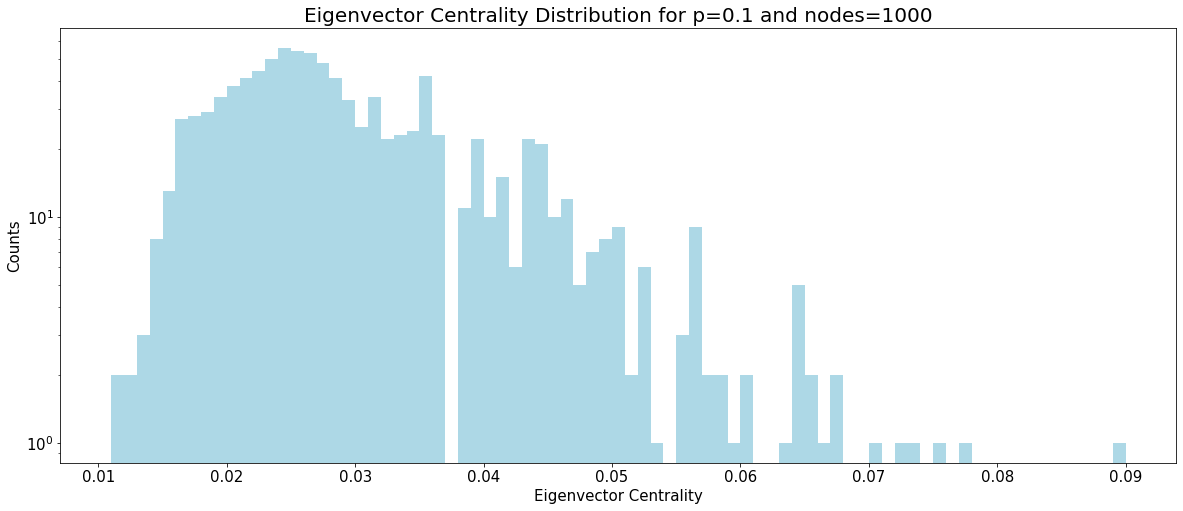

In [9]:
for wsG in wsG_list:

    ev_cent = my_graph.find_eigenvector_centrality(wsG, 10000)
    
    # Find mean eigenvector centrality
    mean_ev_cent = sum(ev_cent.values())/len(ev_cent.values())
    print("The Mean Eigenvector centralitiy for p = {}: {}".format(p_values[i], round(mean_ev_cent,3)))
    
    # plot historgram for eigenvector centrality of the graph
    my_graph.plot_distribution(in_list=ev_cent.values(), pdf=False, cum=False, bw=0.001,\
                            title=f"Eigenvector Centrality Distribution for p={p_values[i]} and nodes={n}",\
                            x_label="Eigenvector Centrality", y_label="Counts",\
                            x_scale="linear", y_scale="log",\
                            c="lightblue")

#### b. Discuss the dependence on p

From the above distribution of Eigenvector Centrality, we can say that:


### 5. The mean betweenness centrality and its distributions for n = 1000 and for each value of p. Discuss the dependence on p:

#### a. The mean betweenness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩:

#### Betweenness Centrality:

Betweenness Centrality measures the extent to which a vertex lies on paths between other vertices. It measure centrality based on shortest paths in a graph.

The Betweenness Centrality for node i is:
  
$$x_{i} = \sum_{st} \frac{n_{st,i}}{g_{st}}$$


Here, 

* ${n_{st,i}}$ is number of geodesic paths from s to t that pass through i.
* ${g_{st}}$ is total number of geodesic paths from s to t.

The Mean Betweenness Centrality for p = 0.1: 0.046


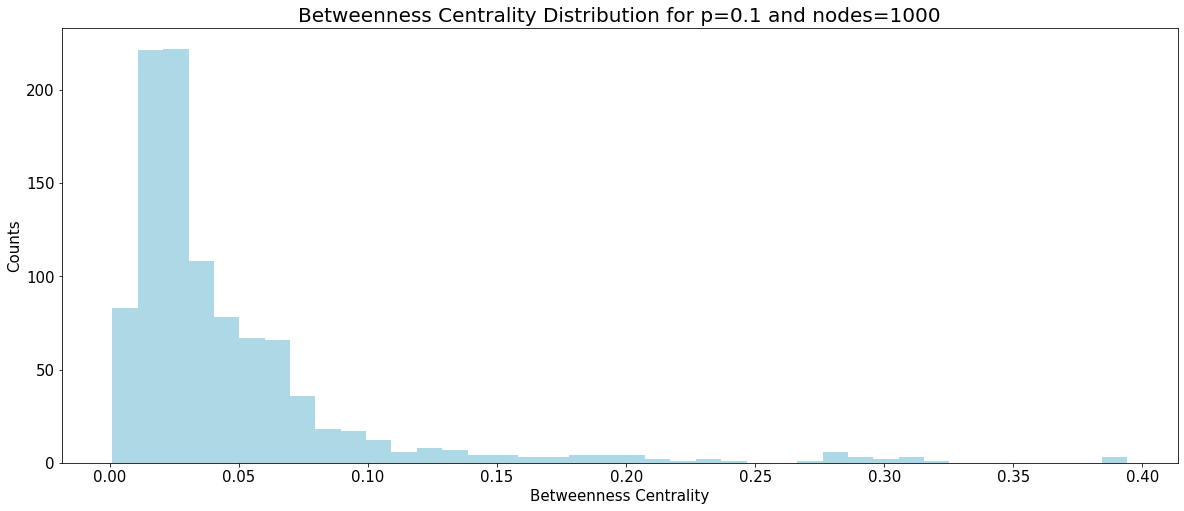

The Mean Betweenness Centrality for p = 0.1: 0.017


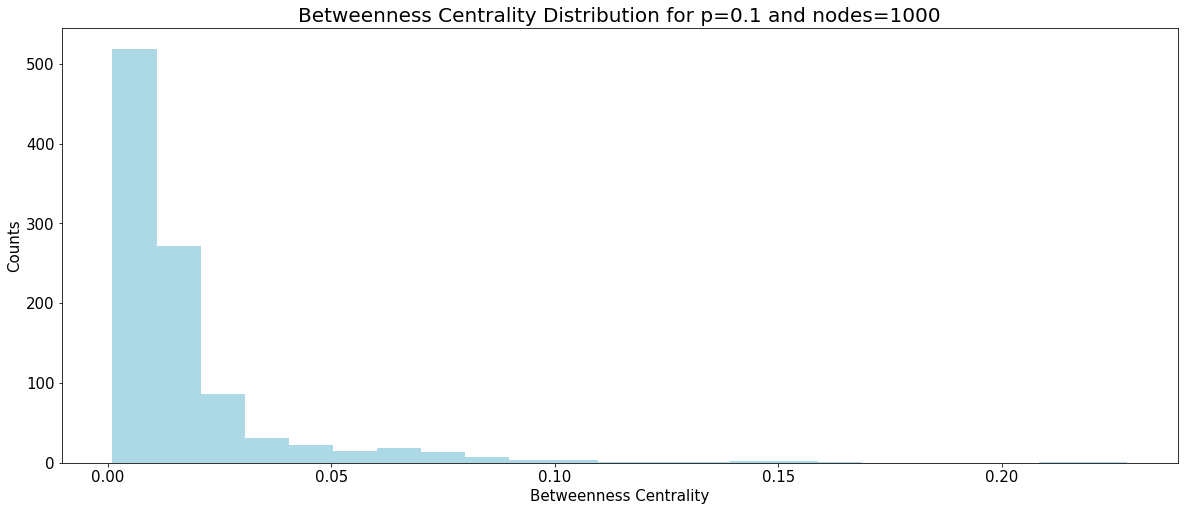

The Mean Betweenness Centrality for p = 0.1: 0.007


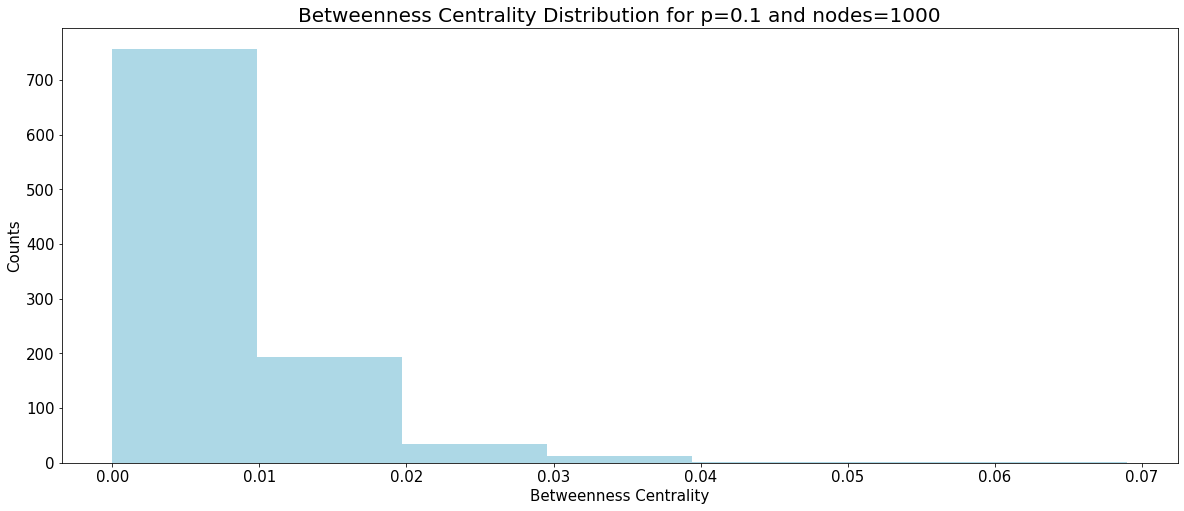

The Mean Betweenness Centrality for p = 0.1: 0.005


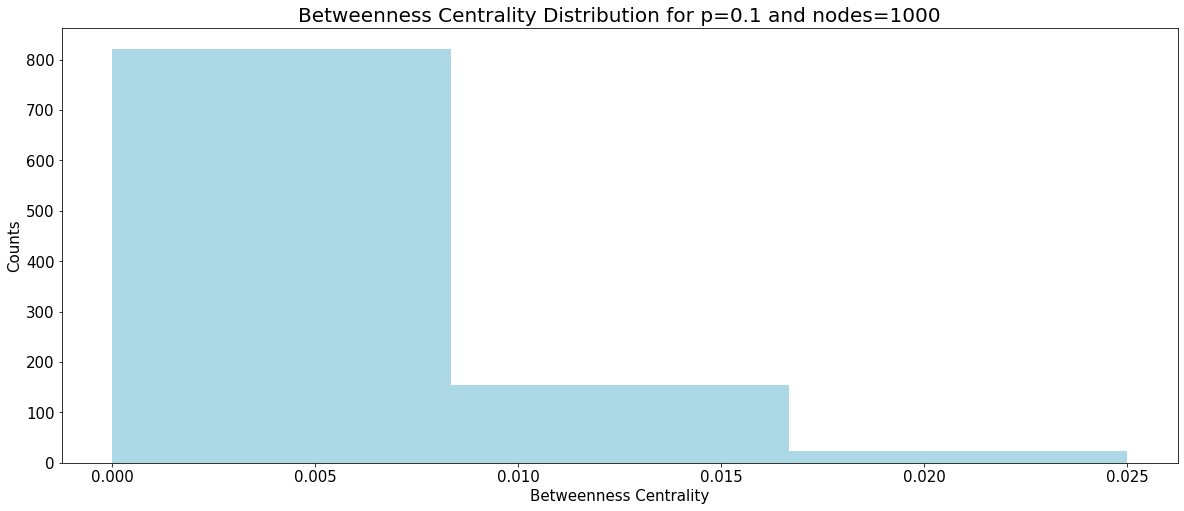

In [10]:
for wsG in wsG_list:
    
    bw_cent = my_graph.find_betweenness_centrality(wsG)
 
    # Find mean betweenness centrality
    mean_bw_cent = sum(bw_cent.values())/len(bw_cent.values())
    print("The Mean Betweenness Centrality for p = {}: {}".format(p_values[i], round(mean_bw_cent,3)))
    
    # plot historgram for betweenness centrality of the graph
    my_graph.plot_distribution(in_list=bw_cent.values(), pdf=False, cum=False, bw=0.01,\
                            title=f"Betweenness Centrality Distribution for p={p_values[i]} and nodes={n}",\
                            x_label="Betweenness Centrality", y_label="Counts",\
                            x_scale="linear", y_scale="linear", \
                            c="lightblue")

#### b. Discuss the dependence on p

We observe that the mean Page Rank value remains relatively similar for the different values of ⟨𝑘⟩.

And from the above plots, we observe that 
* for ⟨𝑘⟩ = 0.1, most of the nodes have the same Page Rank value; which is also equal to the mean value.
* for ⟨𝑘⟩ = 1, nodes with Page Rank further from the mean are generated.
* for larger values of ⟨𝑘⟩= 1,2 and 10, the distribution of Page Rank spreads
* for ⟨𝑘⟩ = 10 it is like a normal distribution.

### 6. The mean closeness centrality and its distributions for n = 1000 and for each value of p. Discuss the dependence on p:

#### a. The mean closeness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩:

#### Closeness Centrality:

Closeness Centrality measures that how close a node is to all other nodes in the network.. 

The Closeness Centrality for node i is:

$$ cc_{i} = \frac{1}{d_{i}} = \frac{(n-1)}{\sum_{j} d_{ij}}$$

Here:
* $d_{ij}$ is the length of a geodesic path from i to j
* $d_{i}$ is mean geodesic distance from i to j
* n is number of nodes in the network

The Mean Page Rank for p = 0.1: 0.022


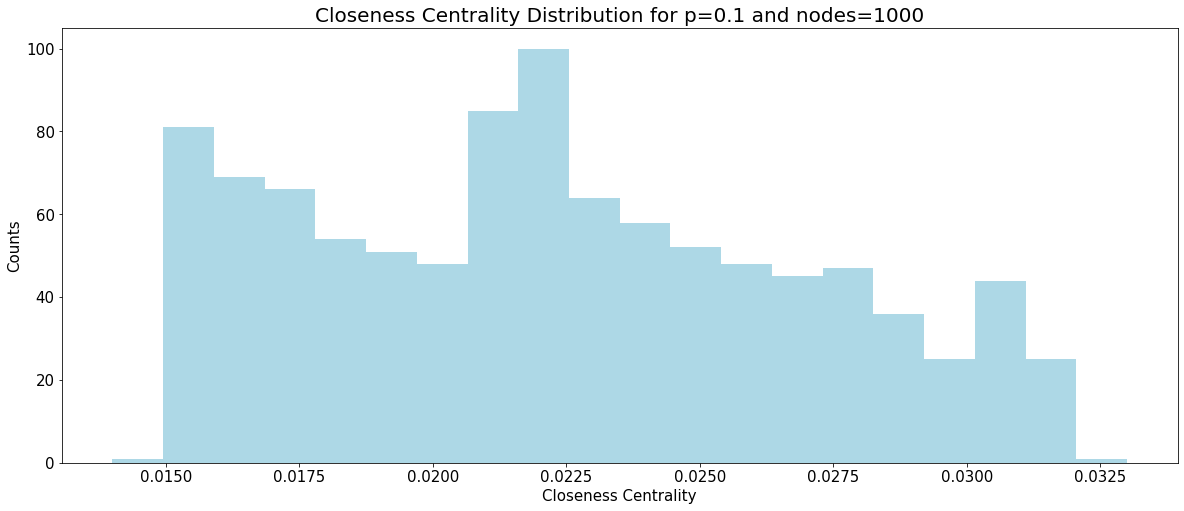

The Mean Page Rank for p = 0.1: 0.059


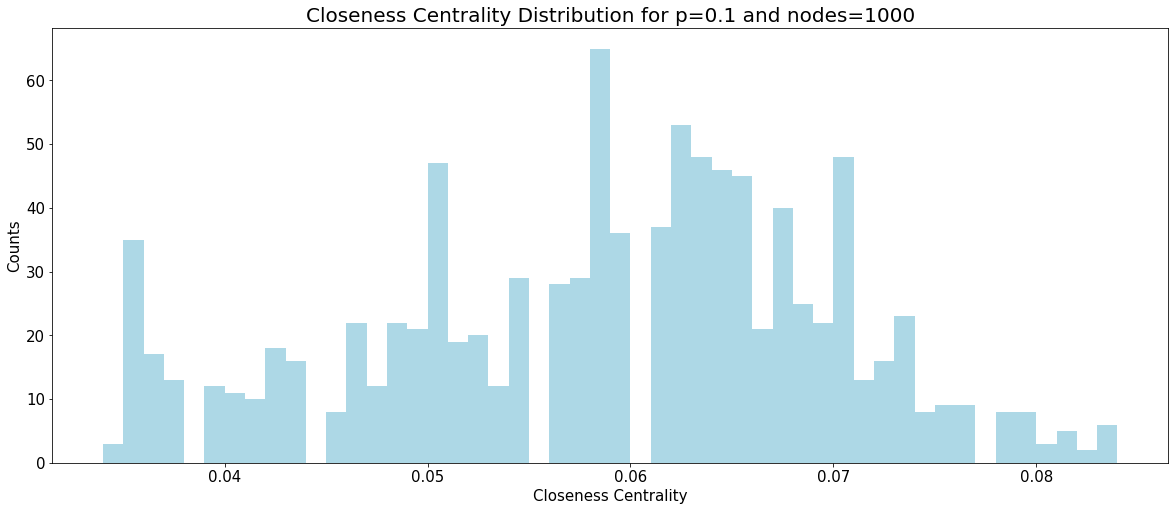

The Mean Page Rank for p = 0.1: 0.133


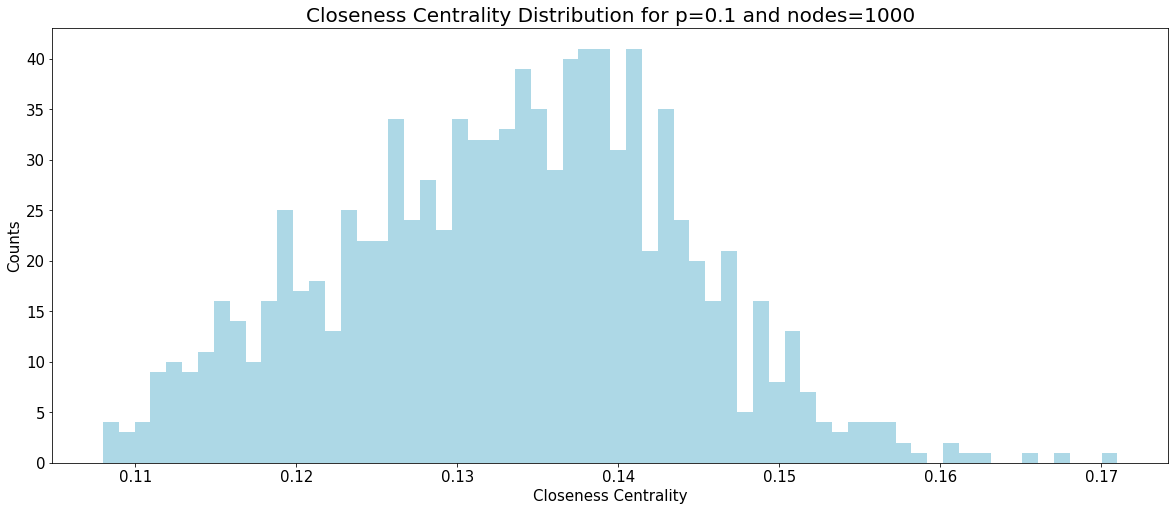

The Mean Page Rank for p = 0.1: 0.165


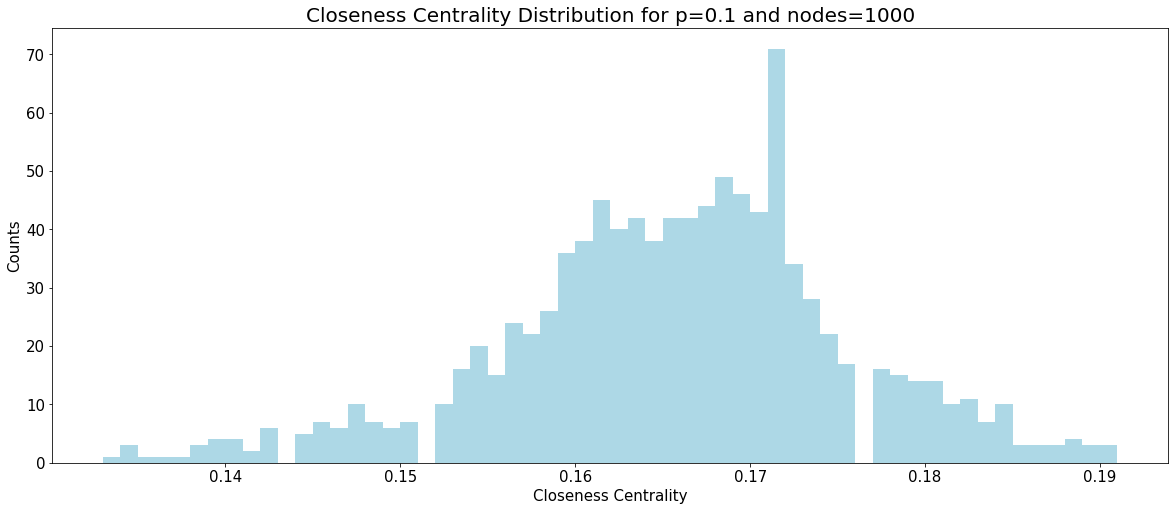

In [11]:
for wsG in wsG_list:
    
    close_cent = my_graph.find_closeness_centrality(wsG)
 
    # Find mean closeness centrality
    mean_close_cent = sum(close_cent.values())/len(close_cent.values())
    print("The Mean Page Rank for p = {}: {}".format(p_values[i], round(mean_close_cent,3)))
    
    # plot historgram for closeness centrality of the graph
    my_graph.plot_distribution(in_list=close_cent.values(), pdf=False, cum=False, bw=0.001,\
                            title=f"Closeness Centrality Distribution for p={p_values[i]} and nodes={n}",\
                            x_label="Closeness Centrality", y_label="Counts",\
                            x_scale="linear", y_scale="linear", \
                            c="lightblue")

#### b. Discuss the dependence on p

We observe that the mean Page Rank value remains relatively similar for the different values of ⟨𝑘⟩.

And from the above plots, we observe that 
* for ⟨𝑘⟩ = 0.1, most of the nodes have the same Page Rank value; which is also equal to the mean value.
* for ⟨𝑘⟩ = 1, nodes with Page Rank further from the mean are generated.
* for larger values of ⟨𝑘⟩= 1,2 and 10, the distribution of Page Rank spreads
* for ⟨𝑘⟩ = 10 it is like a normal distribution.

### 7. Calculate the mean clustering coefficient for n = 10, 100, 1000 and for each value og p. Discuss the dependence on p and n: 

Mean Clustering Coefficient for n = 10 and p = [0.001, 0.01, 0.05, 0.1]: [0.6, 0.6, 0.63238, 0.59429]
Mean Clustering Coefficient for n = 100 and p = [0.001, 0.01, 0.05, 0.1]: [0.59429, 0.58752, 0.4721, 0.41425]
Mean Clustering Coefficient for n = 1000 and p = [0.001, 0.01, 0.05, 0.1]: [0.59839, 0.58746, 0.5204, 0.46132]





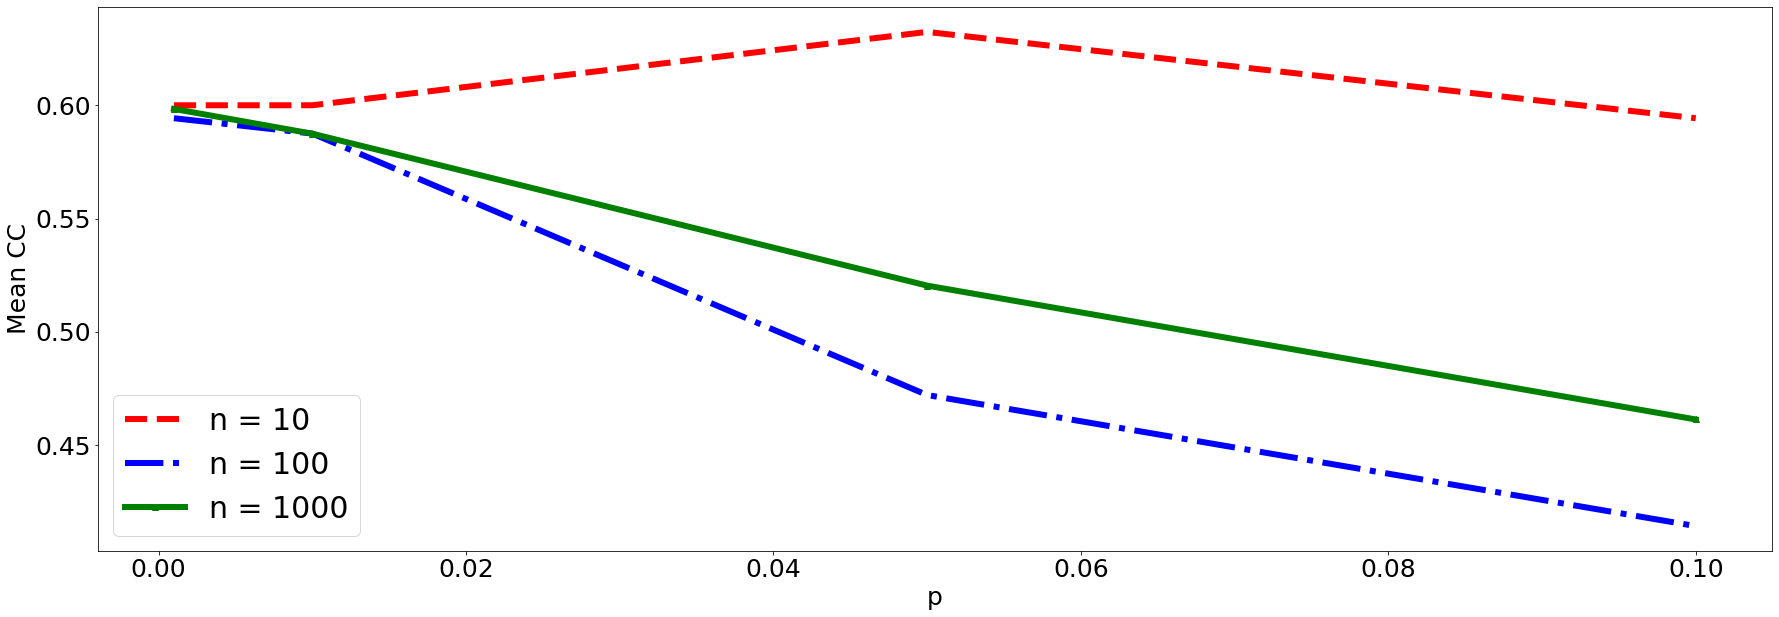

In [18]:
nodes = [10, 100, 1000]

plt.figure(figsize = (30,10))
fig_num = 130
mean_cc_all = []

for n in nodes:
    mean_cc_list = []
    for p in p_values:
        
        wsG = nx.watts_strogatz_graph(n, k0, p)
        
        # Find Mean Clustering Coefficient of the graph
        mean_cc_list.append(round(nx.average_clustering(wsG),5))
        
    print("Mean Clustering Coefficient for n = {} and p = {}: {}".format(n,p_values,mean_cc_list))
    
    mean_cc_all.append(mean_cc_list)
    
plt.plot(p_values, mean_cc_all[0],'r--', label='n = 10',linewidth=6)
plt.plot(p_values, mean_cc_all[1],'b-.', label='n = 100',linewidth=6)
plt.plot(p_values, mean_cc_all[2],'g-^', label='n = 1000',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('p',size=25)
plt.ylabel('Mean CC',size=25)
plt.legend(fontsize = 30)
print("\n\n")

Mean Clustering Coefficient for n = 1000 and p = [0.001, 0.01, 0.05, 0.1]: [0.6, 0.5909, 0.59886]
Mean Clustering Coefficient for n = 1000 and p = [0.001, 0.01, 0.05, 0.1]: [0.6, 0.5839, 0.5864]
Mean Clustering Coefficient for n = 1000 and p = [0.001, 0.01, 0.05, 0.1]: [0.6, 0.52188, 0.50811]
Mean Clustering Coefficient for n = 1000 and p = [0.001, 0.01, 0.05, 0.1]: [0.61524, 0.45788, 0.42944]





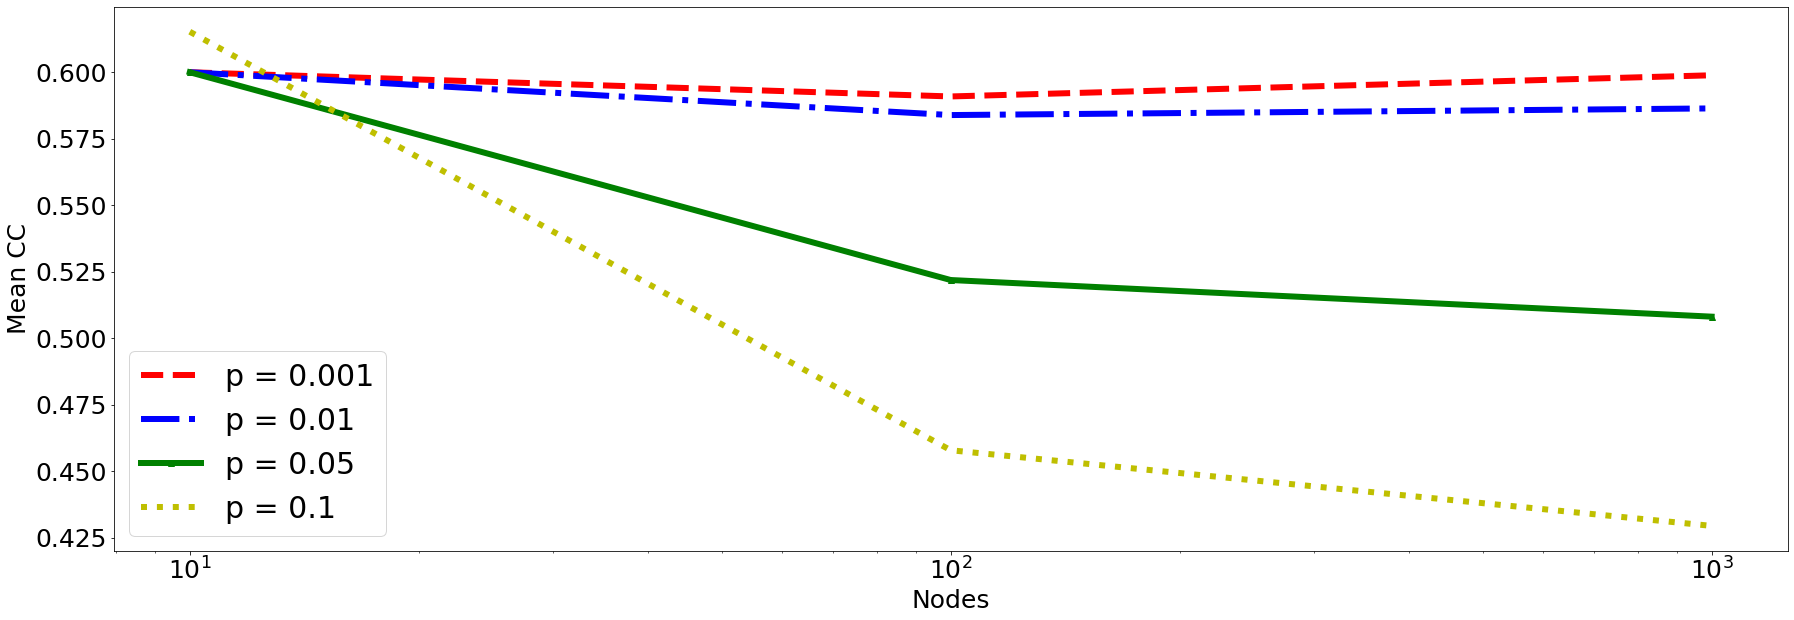

In [17]:
plt.figure(figsize = (30,10))
fig_num = 130
mean_cc_all = []

for p in p_values:
    mean_cc_list = []
    for n in nodes:
        
        wsG = nx.watts_strogatz_graph(n, k0, p)
        
        # Find Mean Clustering Coefficient of the graph
        mean_cc_list.append(round(nx.average_clustering(wsG),5))
        
    print("Mean Clustering Coefficient for n = {} and p = {}: {}".format(n,p_values,mean_cc_list))
    
    mean_cc_all.append(mean_cc_list)
    
plt.plot(nodes, mean_cc_all[0],'r--', label='p = 0.001',linewidth=6)
plt.plot(nodes, mean_cc_all[1],'b-.', label='p = 0.01',linewidth=6)
plt.plot(nodes, mean_cc_all[2],'g-^', label='p = 0.05',linewidth=6)
plt.plot(nodes, mean_cc_all[3],'y:', label='p = 0.1',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xscale('log')
plt.xlabel('Nodes',size=25)
plt.ylabel('Mean CC',size=25)
plt.legend(fontsize = 30)
print("\n\n")